In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
X = df.drop(columns =['Outcome'])

In [14]:
y = df['Outcome']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) 
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2) 

In [48]:
X_train.shape

(491, 8)

In [58]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\임은재\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)


In [64]:
history = model.fit(X_train,
                   y_train,
                   epochs=50,
                   batch_size=32,
                   validation_data=(X_valid, y_valid))

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - binary_accuracy: 0.3694 - loss: 0.7405 - val_binary_accuracy: 0.4797 - val_loss: 0.7101
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.5452 - loss: 0.7050 - val_binary_accuracy: 0.6504 - val_loss: 0.6805
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6505 - loss: 0.6726 - val_binary_accuracy: 0.6829 - val_loss: 0.6572
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6832 - loss: 0.6582 - val_binary_accuracy: 0.6992 - val_loss: 0.6393
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7372 - loss: 0.6293 - val_binary_accuracy: 0.7154 - val_loss: 0.6234
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7422 - loss: 0.6088 - val_binary_accuracy: 0.7236 - val_loss: 0.6093
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7080 - loss: 0.6060 - val_binary_accuracy: 0.7154 - val_loss: 0.5980
Epoch 8/50
16/16 ━━

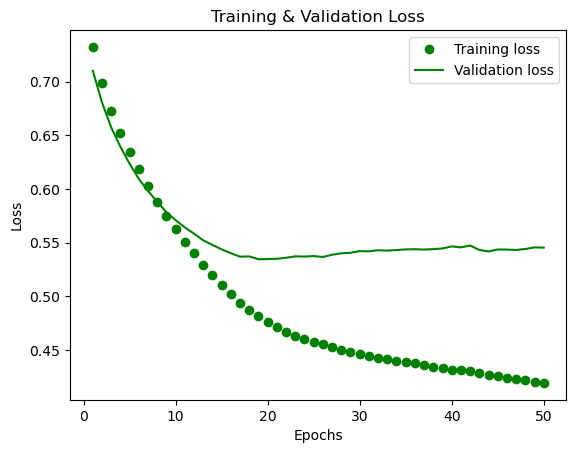

In [66]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'go', label='Training loss') #go : green dot
plt.plot(epochs, val_loss, 'g', label='Validation loss') #g : green line
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [78]:
y_pred=model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [98]:
y_pred

array([[0.39371648],
       [0.00646973],
       [0.2085638 ],
       [0.53044796],
       [0.12440593],
       [0.5086274 ],
       [0.04382872],
       [0.39457947],
       [0.00190723],
       [0.21948297],
       [0.29415447],
       [0.06925355],
       [0.10379759],
       [0.5735798 ],
       [0.32119572],
       [0.2252478 ],
       [0.14552617],
       [0.3175368 ],
       [0.7716824 ],
       [0.93833935],
       [0.2648847 ],
       [0.10511319],
       [0.3673169 ],
       [0.01791575],
       [0.39978907],
       [0.48529652],
       [0.02635557],
       [0.59533477],
       [0.49696463],
       [0.80849415],
       [0.5425254 ],
       [0.15894537],
       [0.37719244],
       [0.32989362],
       [0.20928867],
       [0.2520873 ],
       [0.3582115 ],
       [0.5546855 ],
       [0.47111386],
       [0.15412226],
       [0.13230914],
       [0.50212836],
       [0.4107164 ],
       [0.420275  ],
       [0.8927768 ],
       [0.03353615],
       [0.19361234],
       [0.060

In [104]:
y_pred_binary = (y_pred > 0.5).astype(int)
y_pred_binary

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [110]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_binary)
cm

array([[83, 10],
       [31, 30]], dtype=int64)